### Stroke Prediction - Descriptive Analysis


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# import data set

strokedata = pd.read_csv('healthcare-dataset-stroke-data 2.csv')
strokedata

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [20]:
# evaluate datatypes in df 
strokedata.dtypes


id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [21]:
# see count of non-null entries 
strokedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


---

#### Gender Analysis

In [22]:
from operator import index
genderoccurences = strokedata.groupby(['gender', 'stroke']).size()
genderodf = pd.DataFrame(genderoccurences).reset_index()
genderodf
#rename columns
genderodf.rename(columns={0:"totals"})


,gender,stroke,totals
0,Female,0,2853
1,Female,1,141
2,Male,0,2007
3,Male,1,108
4,Other,0,1


Text(0.5, 0, 'Gender')

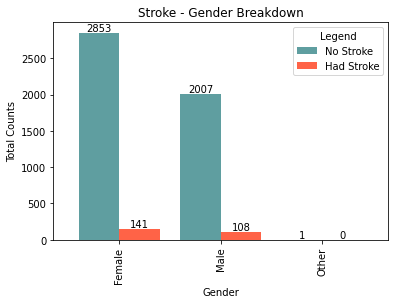

In [23]:
#create bar graph based on pivot table
ax = genderodf.pivot_table(index='gender', columns='stroke').plot(kind='bar', width=0.8, color=['cadetblue', 'tomato'])
plt.legend(['No Stroke', 'Had Stroke'], loc="upper right", title='Legend')

#insert labels for bars
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')

# Give Titles
plt.title('Stroke - Gender Breakdown')
plt.ylabel('Total Counts')
plt.xlabel('Gender')


---

#### Age Analysis

In [24]:
agebreakdown = strokedata.groupby('age')['stroke'].nunique()
age = strokedata.groupby('stroke')['age'].unique()
print(agebreakdown)

age
0.08     1
0.16     1
0.24     1
0.32     1
0.40     1
        ..
78.00    2
79.00    2
80.00    2
81.00    2
82.00    2
Name: stroke, Length: 104, dtype: int64


In [25]:
ageocc = strokedata.groupby(['age', 'stroke']).size()
ageoccst = pd.DataFrame(ageocc).reset_index()
ageoccst = ageoccst.rename(columns={0:"totals"})
ageoccst
ageoccstrokeonly = (ageoccst[ageoccst['stroke'] == 1])
ageoccstrokeonly

,age,stroke,totals
16,1.32,1,1
37,14.00,1,1
56,32.00,1,1
63,38.00,1,2
65,39.00,1,3
69,42.00,1,1
71,43.00,1,1
74,45.00,1,3
76,46.00,1,1
78,47.00,1,1


Text(0.5, 0, 'Age')

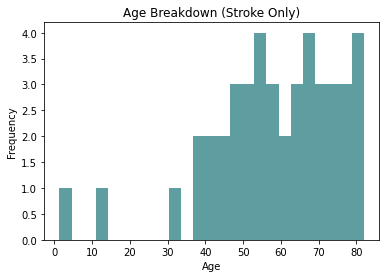

In [26]:
#plot histo based on age dataframe
plt.hist(ageoccstrokeonly['age'], bins=25, color=['cadetblue'])

plt.title('Age Breakdown (Stroke Only)')
plt.ylabel('Frequency')
plt.xlabel('Age')


---


#### Heart Disease - Stroke Analysis

In [27]:
heartdprev = strokedata.groupby(['heart_disease', 'stroke']).size()
heartdprev
heartdprev = pd.DataFrame(heartdprev).reset_index()
heartdprev.rename(columns={0:"prevalence"})


,heart_disease,stroke,prevalence
0,0,0,4632
1,0,1,202
2,1,0,229
3,1,1,47


---

#### Correlation Matrix

In [84]:
import seaborn as sns
strokedatac = strokedata.drop('id', axis=1)
#clean up df marriage
strokedatac.ever_married.unique()
strokedatac.loc[(strokedatac.ever_married == 'Yes'),'ever_married']= 1
strokedatac.loc[(strokedatac.ever_married == 'No'),'ever_married']= 0

#clean up df worktype
print(strokedatac.work_type.unique())
strokedatac.loc[(strokedatac.work_type == 'Private'),'work_type']= 0
strokedatac.loc[(strokedatac.work_type == 'Self-employed'),'work_type']= 1
strokedatac.loc[(strokedatac.work_type == 'Govt_job'),'work_type']= 2
strokedatac.loc[(strokedatac.work_type == 'children'),'work_type']= 3
strokedatac.loc[(strokedatac.work_type == 'Never_worked'),'work_type']= 4
# add round to make values easier to look at
# 

# clean up resi. type
print(strokedatac.Residence_type.unique())
strokedatac.loc[(strokedatac.Residence_type == 'Urban'),'Residence_type']= 0
strokedatac.loc[(strokedatac.Residence_type == 'Rural'),'Residence_type']= 1

# clean up smoking stat
print(strokedatac.smoking_status.unique())
strokedatac.loc[(strokedatac.smoking_status == 'formerly smoked'),'smoking_status']= 0
strokedatac.loc[(strokedatac.smoking_status == 'never smoked'),'smoking_status']= 1
strokedatac.loc[(strokedatac.smoking_status == 'smokes'),'smoking_status']= 2
strokedatac.loc[(strokedatac.smoking_status == 'Unknown'),'smoking_status']= 3


#clean up df gender
print(strokedatac.gender.unique())
strokedatac.loc[(strokedatac.gender == 'Female'),'gender']=0
strokedatac.loc[(strokedatac.gender == 'Male'),'gender']= 1
strokedatac.loc[(strokedatac.gender == 'Other'),'gender']= 2


strokedatac["ever_married"] = pd.to_numeric(strokedatac["ever_married"])
strokedatac["work_type"] = pd.to_numeric(strokedatac["work_type"])
strokedatac["Residence_type"] = pd.to_numeric(strokedatac["Residence_type"])
strokedatac["smoking_status"] = pd.to_numeric(strokedatac["smoking_status"])
strokedatac["gender"] = pd.to_numeric(strokedatac["gender"])
# strokedatac.dtypes


['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
['Male' 'Female' 'Other']


In [86]:
strokedatac.corr().round(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.00,-0.03,0.02,0.09,-0.03,0.07,0.01,0.06,-0.03,0.04,0.01
age,-0.03,1.00,0.28,0.26,0.68,-0.41,-0.01,0.24,0.33,-0.38,0.25
hypertension,0.02,0.28,1.00,0.11,0.16,-0.08,0.01,0.17,0.17,-0.13,0.13
heart_disease,0.09,0.26,0.11,1.00,0.11,-0.06,-0.00,0.16,0.04,-0.06,0.13
ever_married,-0.03,0.68,0.16,0.11,1.00,-0.38,-0.01,0.16,0.34,-0.30,0.11
work_type,0.07,-0.41,-0.08,-0.06,-0.38,1.00,-0.01,-0.07,-0.35,0.31,-0.06
Residence_type,0.01,-0.01,0.01,-0.00,-0.01,-0.01,1.00,0.00,0.00,-0.00,-0.02
avg_glucose_level,0.06,0.24,0.17,0.16,0.16,-0.07,0.00,1.00,0.18,-0.10,0.13
bmi,-0.03,0.33,0.17,0.04,0.34,-0.35,0.00,0.18,1.00,-0.24,0.04
smoking_status,0.04,-0.38,-0.13,-0.06,-0.30,0.31,-0.00,-0.10,-0.24,1.00,-0.07


<AxesSubplot:>

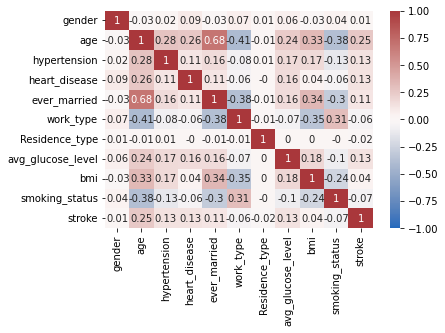

In [89]:
# create correlation matrix
sns.heatmap(strokedatac.corr().round(2), annot=True,vmin=-1, vmax=1, center=0, cmap='vlag')